In [40]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [41]:
def init_state_social_distancing_actions(path):
  df_master = pd.DataFrame()
  flag = False
  files_in_folder = glob.glob(path)
  for filename in files_in_folder:    
    zip_file = ZipFile(filename)
    for text_file in zip_file.infolist():
      # if not text_file.filename.startswith('__MACOSX/'):
      if text_file.filename.endswith('.csv'):
        date = re.search('\d*-\d*-\d*', text_file.filename)[0]
        if date == "20201-06-01":
          date = "2021-06-01"
        date_time_value = pd.to_datetime(date)
        df = pd.read_csv(zip_file.open(text_file.filename), sep=",", header=0)
        df["Date"] = date_time_value
        df.rename(columns = {'Unnamed: 0':'State'}, inplace = True)
        df.drop((df[df.State.isin(["United States"])].index) | (df[df.State.isnull()].index), inplace=True)
      if not flag:
        df_master = df
        flag = True
      else:
        df_master = pd.concat([df_master, df])
  df_master.set_index(["Date", "State"], inplace=True)
  df_master.sort_index(inplace=True)
  return df_master

state_social_distancing_actions = init_state_social_distancing_actions(r'**csv_files/state_social_distancing_actions.zip')

Clean up the dataframe to remove unused columns and solve for Nan fields

In [42]:
def clean_state_social_distancing_actions(df):
  # TODO: Remove cells we don't want
  df = df.drop(columns=["Primary Election Postponement"])
  return df

cleaned_state_social_distancing_actions = clean_state_social_distancing_actions(state_social_distancing_actions)
cleaned_state_social_distancing_actions

State Is Easing Social Distancing Measures  \
Date       State                                                      
2020-06-04 Alabama                                              Yes   
           Alaska                                               Yes   
           Arizona                                              Yes   
           Arkansas                                             Yes   
           California                                           Yes   
...                                                             ...   
2021-11-09 Virginia                                             NaN   
           Washington                                           NaN   
           West Virginia                                        NaN   
           Wisconsin                                            NaN   
           Wyoming                                              NaN   

                         Stay at Home Order  \
Date       State                              
2020-06-04 Alabama                   Lifted   
           Alaska                    Lifted   
           Arizona                   Lifted   
           Arkansas                       -   
           California             Statewide   
...                                     ...   
2021-11-09 Virginia                     NaN   
           Washington                   NaN   
           West Virginia                NaN   
           Wisconsin                    NaN   
           Wyoming                      NaN   

                         Mandatory Quarantine for Travelers  \
Date       State                                              
2020-06-04 Alabama                                        -   
           Alaska                             All Travelers   
           Arizona                                   Lifted   
           Arkansas                     From Certain States   
           California                                     -   
...                                                     ...   
2021-11-09 Virginia                                     NaN   
           Washington                                   NaN   
           West Virginia                                NaN   
           Wisconsin                                    NaN   
           Wyoming                                      NaN   

                                            Non-Essential Business Closures  \
Date       State                                                              
2020-06-04 Alabama        All Non-Essential Businesses Permitted to Reop...   
           Alaska          All Non-Essential Businesses Permitted to Reopen   
           Arizona        All Non-Essential Businesses Permitted to Reop...   
           Arkansas                                                       -   
           California     Some Non-Essential Businesses Permitted to Reo...   
...                                                                     ...   
2021-11-09 Virginia                                                     NaN   
           Washington                                                   NaN   
           West Virginia                                                NaN   
           Wisconsin                                                    NaN   
           Wyoming                                                      NaN   

                               Large Gatherings Ban  \
Date       State                                      
2020-06-04 Alabama                           Lifted   
           Alaska                            Lifted   
           Arizona                           Lifted   
           Arkansas           >10 People Prohibited   
           California     All Gatherings Prohibited   
...                                             ...   
2021-11-09 Virginia                             NaN   
           Washington                           NaN   
           West Virginia                        NaN   
           Wisconsin                

Display 

In [43]:
california_data = cleaned_state_social_distancing_actions[cleaned_state_social_distancing_actions.index.get_level_values('State').isin(['California'])]
california_data_mask_mandate = california_data[[ "Face Covering Requirement","Statewide Face Mask Requirement"]]
california_data_mask_mandate.values

# colors = sns.color_palette('pastel')
# plt.pie(california_data_mask_mandate.values, colors = colors)
# plt.show()

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public', nan],
       ['Required for General Public',

In [44]:
def init_infection_dataframe_from_zip(path, index_col):
    df_master = pd.read_csv(glob.glob(path)[0], compression='zip', header=0, sep=',', index_col=index_col)
    return df_master

infected_df = init_infection_dataframe_from_zip(r'**csv_files/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv.zip', ["submission_date", "state"])

In [48]:
infected_df.index = infected_df.index.set_levels([pd.to_datetime(infected_df.index.levels[0]), infected_df.index.levels[1]])
infected_df.sort_index()

tot_cases  conf_cases  prob_cases  new_case  pnew_case  \
submission_date state                                                           
2020-01-22      AK             0         NaN         NaN         0        NaN   
                AL             0         0.0         0.0         0        0.0   
                AR             0         NaN         NaN         0        NaN   
                AS             0         NaN         NaN         0        NaN   
                AZ             0         NaN         NaN         0        NaN   
...                          ...         ...         ...       ...        ...   
2022-04-18      VT        111815         NaN         NaN       973       56.0   
                WA       1477863         NaN         NaN      3315      360.0   
                WI       1596614   1402990.0    193624.0      1674      138.0   
                WV        499193    395875.0    103318.0       303       99.0   
                WY        156258    123253.0     33005.0         0        0.0   

                       tot_death  conf_death  prob_death  new_death  \
submission_date state                                                 
2020-01-22      AK             0         NaN         NaN          0   
                AL             0         0.0         0.0          0   
                AR             0         NaN         NaN          0   
                AS             0         NaN         NaN          0   
                AZ             0         NaN         NaN          0   
...                          ...         ...         ...        ...   
2022-04-18      VT           593         NaN         NaN          0   
                WA         12626         NaN         NaN          7   
                WI         14391     12862.0      1529.0          1   
                WV          6796         NaN         NaN          2   
                WY          1801      1801.0         0.0          0   

                       pnew_death              created_at consent_cases  \
submission_date state                                                     
2020-01-22      AK            NaN  03/26/2020 04:22:39 PM           NaN   
                AL            0.0  01/24/2020 12:00:00 AM         Agree   
                AR            NaN  03/26/2020 04:22:39 PM     Not agree   
                AS            NaN  03/26/2020 04:22:39 PM           NaN   
                AZ            NaN  03/26/2020 04:22:39 PM         Agree   
...                           ...                     ...           ...   
2022-04-18      VT            0.0  04/19/2022 01:21:35 PM     Not agree   
                WA            0.0  04/19/2022 01:21:35 PM           NaN   
                WI            0.0  04/19/2022 01:21:35 PM         Agree   
                WV            1.0  04/19/2022 01:21:35 PM         Agree   
                WY            0.0  04/19/2022 01:21:35 PM         Agree   

                      consent_deaths  
submission_date state                 
2020-01-22      AK               NaN  
                AL             Agree  
                AR         Not agree  
                AS               NaN  
                AZ             Agree  
...                              ...  
2022-04-18      VT         Not agree  
                WA               NaN  
                WI             Agree  
                WV         Not agree  
                WY             Agree  

[49080 rows x 13 columns]

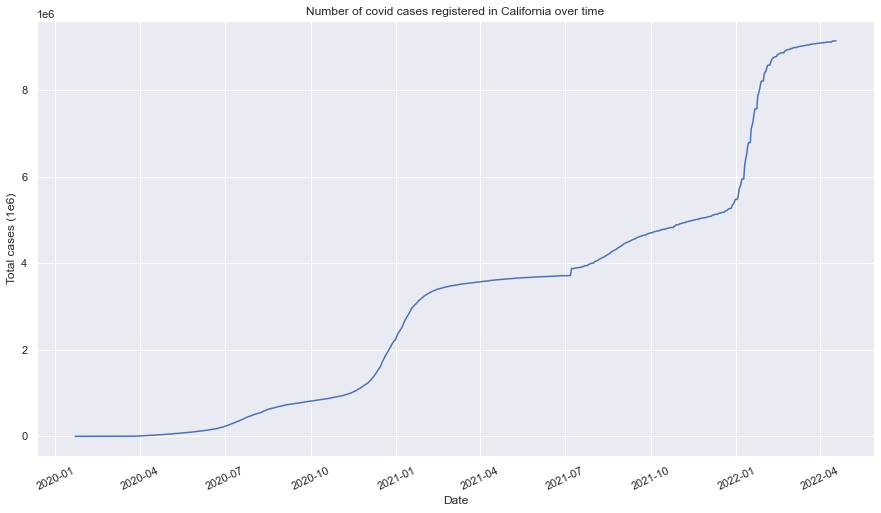

In [57]:
sns.set(rc = {'figure.figsize':(15,8)})
#sns.lineplot(x = "submission_date", y = "tot_cases", data = infected_df)
plot = sns.lineplot(x = "submission_date", y = "tot_cases", data = infected_df[infected_df.index.get_level_values('state').isin(['CA'])])
plot.set(xlabel='Date', ylabel='Total cases (1e6)')
plot.set_title('Total number of covid cases registered in California over time');
plt.xticks(rotation = 25);

In [ ]:
#TODO: Create visualization of current number of covid cases